<a href="https://colab.research.google.com/github/K-ra-droid/CodeWay/blob/main/SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

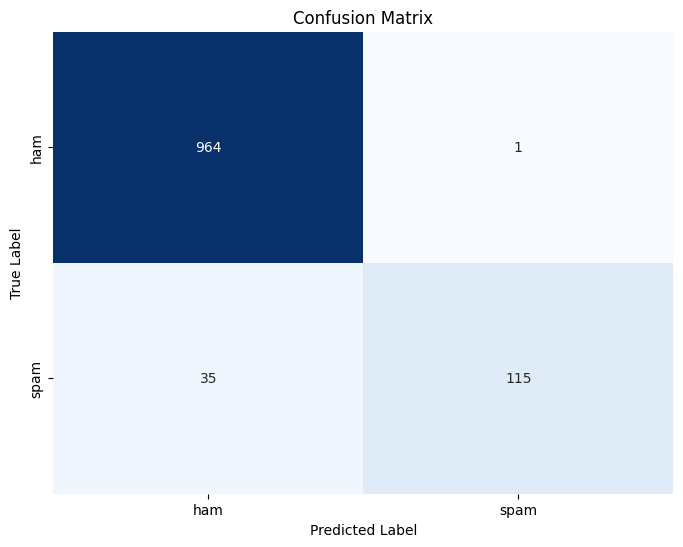

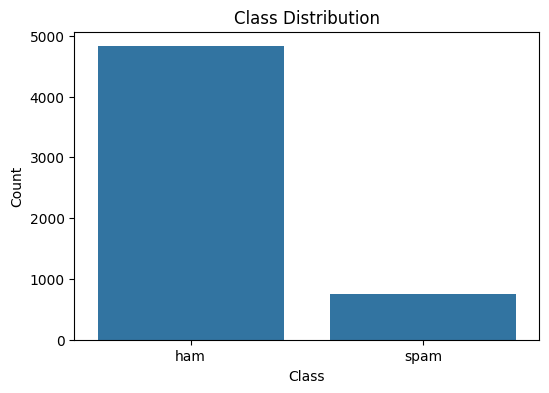

Accuracy: 0.967713004484305
Confusion Matrix:
[[964   1]
 [ 35 115]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Load dataset
df = pd.read_csv("spam.csv", encoding='latin1')

X = df['v2']
y = df['v1']

# Check if columns exist before dropping
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df = df[['v1', 'v2']].drop(columns_to_drop, axis=1, errors='ignore')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression()

# Train the model
logistic_regression_model.fit(X_train_tfidf, y_train)

# Make predictions on the testing set
predictions = logistic_regression_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Data Visualization
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Class Distribution Bar Chart
plt.figure(figsize=(6, 4))
sns.countplot(x='v1', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")
